## Reading Data

In [1]:
# get the path to datasets
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import pandas as pd

/kaggle/input/amazon-reviews/amazon_review_polarity_csv.tgz
/kaggle/input/amazon-reviews/train.csv
/kaggle/input/amazon-reviews/test.csv


In [2]:
# read train data from the path found above 
train_data = pd.read_csv('/kaggle/input/amazon-reviews/train.csv', header=None)
train_data.head()

,0,1,2
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [3]:
# read test data from the path found 
test_data = pd.read_csv('/kaggle/input/amazon-reviews/test.csv', header=None)
test_data.head()

,0,1,2
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   0       int64 
 1   1       object
 2   2       object
dtypes: int64(1), object(2)
memory usage: 82.4+ MB


In [5]:
train_data.describe()

,0
count,3600000.0
mean,1.5
std,0.5
min,1.0
25%,1.0
50%,1.5
75%,2.0
max,2.0


In [6]:
print('Shape of Train Data: ',train_data.shape)
print('Shape of Test Data: ',test_data.shape)

Shape of Train Data:  (3600000, 3)
Shape of Test Data:  (400000, 3)


In [7]:
train_data = train_data.head(50000)
test_data = test_data.head(5000)

In [8]:
train_data.columns=["polarity","title","text"]
test_data.columns=['polarity',"title","text"]

In [9]:
train_data.head()

,polarity,title,text
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


## Exploratory Data Analysis

### Data Preprocessing

In [10]:
def concat_columns(df, col1, col2, new_col):
    df[new_col] = df[col1].apply(str) + ' ' + df[col2].apply(str)
    df.drop(col2, axis = 1, inplace = True)
    return df

train_data = concat_columns(train_data, 'text', 'title', 'text')
test_data = concat_columns(test_data, 'text', 'title', 'text')

In [11]:
# import ssl

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

# nltk.download('stopwords')
# nltk.download('punkt')

#### Cleaning

In [12]:
import re
from nltk.corpus import stopwords
import nltk


def clean_text(text):

    # Make text lowercase
    text = text.lower()

    # Remove text in square brackets
    text = re.sub('\[.*?\]', '', text)

    # Remove links
    text = re.sub('https?://\S+|www\.\S+', '', text)

    # Remove punctuation
    text = re.sub('[^a-zA-Z0-9\s]+', '', text)

    # Remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = text.split()

    filtered_words = [word for word in words if word not in stop_words]
    text = ' '.join(filtered_words)

    # Remove extra whitespace
    text = re.sub('\s+', ' ', text).strip()

    return text

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
# Apply the clean_text function to all text in the 'text' column
train_data['text'] = train_data['text'].apply(clean_text)
test_data['text'] = test_data['text'].apply(clean_text)

# Show the updated dataframe
train_data.head()

,polarity,text
0,2,sound track beautiful paints senery mind well ...
1,2,im reading lot reviews saying best game soundt...
2,2,soundtrack favorite music time hands intense s...
3,2,truly like soundtrack enjoy video game music p...
4,2,youve played game know divine music every sing...


#### Normalization

In [14]:
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')

In [15]:
import nltk
import subprocess

# Download and unzip wordnet
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

[nltk_data] Downloading package wordnet to /kaggle/working/...
[nltk_data]   Package wordnet is already up-to-date!
Archive:  /kaggle/working/corpora/wordnet.zip


replace /kaggle/working/corpora/wordnet/lexnames? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)


In [16]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    """Map POS tag to the first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_text(text):
    # Tokenize the input text into individual words
    tokens = nltk.word_tokenize(text)

    # Lemmatize each token using the WordNetLemmatizer with appropriate POS tag
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]

    # Join the lemmatized tokens back into a single string
    return ' '.join(lemmatized_tokens)

In [17]:
# apply Lemmatization to the 'text' column in your DataFrame
train_data['text'] = train_data['text'].apply(lemmatize_text)
test_data['text'] = test_data['text'].apply(lemmatize_text)

# Show the updated dataframe
train_data.head()

,polarity,text
0,2,sound track beautiful paint senery mind well w...
1,2,im reading lot review say best game soundtrack...
2,2,soundtrack favorite music time hand intense sa...
3,2,truly like soundtrack enjoy video game music p...
4,2,youve played game know divine music every sing...


### Data Visualization

#### Word Cloud

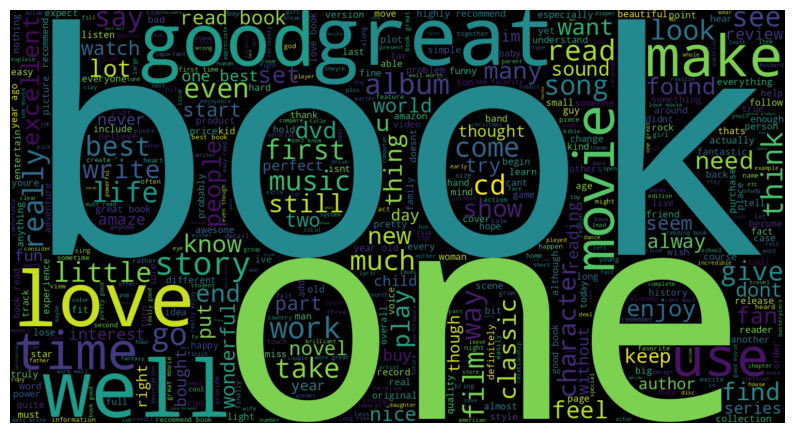

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# for positive reviews
def wordcloud_text(text):
    
    plt.figure(figsize = (10, 8))
    wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
    
positive_words = " ".join(train_data[train_data['polarity'] == 2]['text'])  # 2 for positive
wordcloud_text(positive_words) #for positive sentence

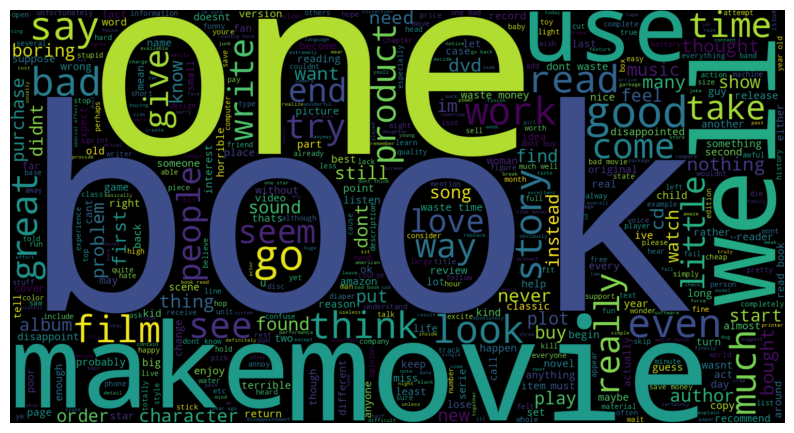

In [19]:
# for negative reviews
def wordcloud_text(text):
    
    plt.figure(figsize = (10, 8))
    wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
    
negative_words = " ".join(train_data[train_data['polarity'] == 1]['text']) # 1 for negative
wordcloud_text(negative_words)  #for negative sentence

#### Data Distribution

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


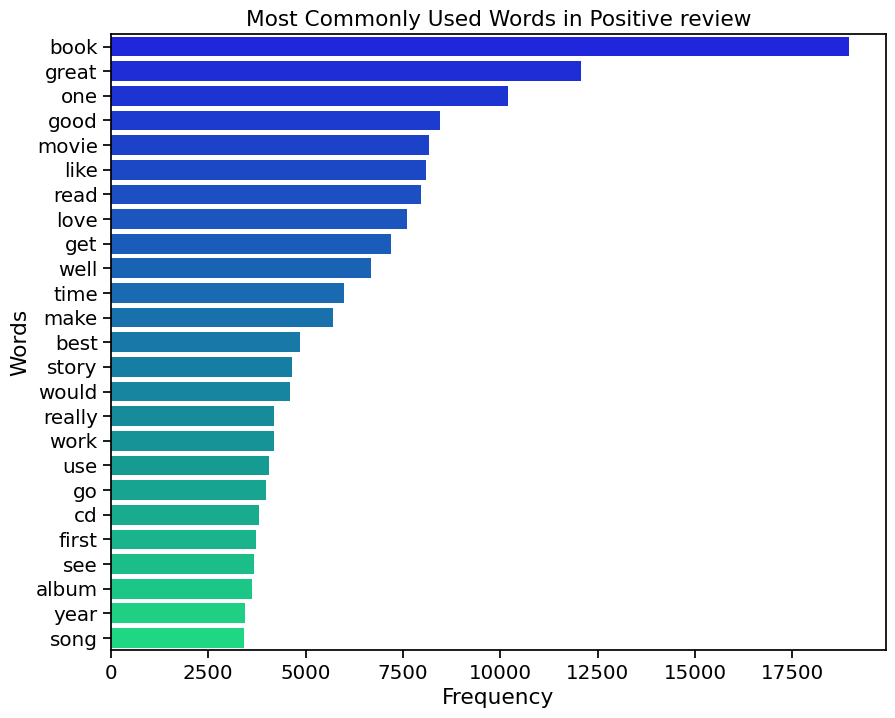

In [20]:
# Frequency distribution of positive reviews

from collections import Counter
import seaborn as sns

def plot_words_freq(words):
    
    df1 = pd.DataFrame(Counter(words).most_common(25), columns= ['Word', 'Frequency'])

    sns.set_context('notebook', font_scale= 1.3)
    plt.figure(figsize=(10,8))
    sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'winter')
    plt.title("Most Commonly Used Words in Positive review")
    plt.xlabel("Frequency")
    plt.ylabel("Words") 
    return plt.show()


plot_words_freq((positive_words).split())

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


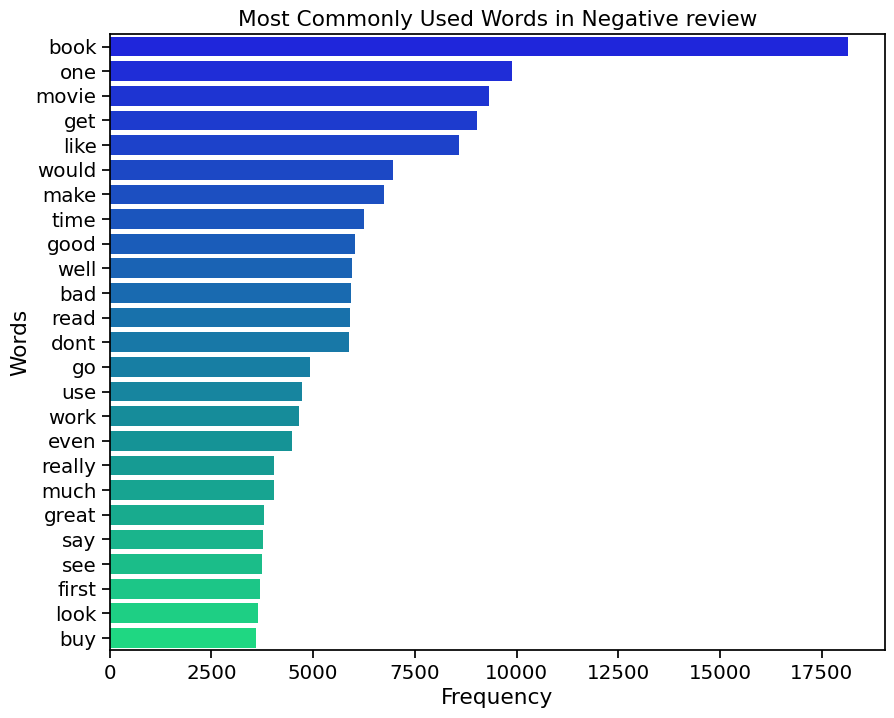

In [21]:
# Frequency distribution of negative reviews

def plot_words_freq(words):
    
    df1 = pd.DataFrame(Counter(words).most_common(25), columns= ['Word', 'Frequency'])

    sns.set_context('notebook', font_scale= 1.3)
    plt.figure(figsize=(10,8))
    sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'winter')
    plt.title("Most Commonly Used Words in Negative review")
    plt.xlabel("Frequency")
    plt.ylabel("Words") 
    return plt.show()


plot_words_freq((negative_words).split())

#### Top 10 most used words

Text(0, 0.5, 'Frequency')

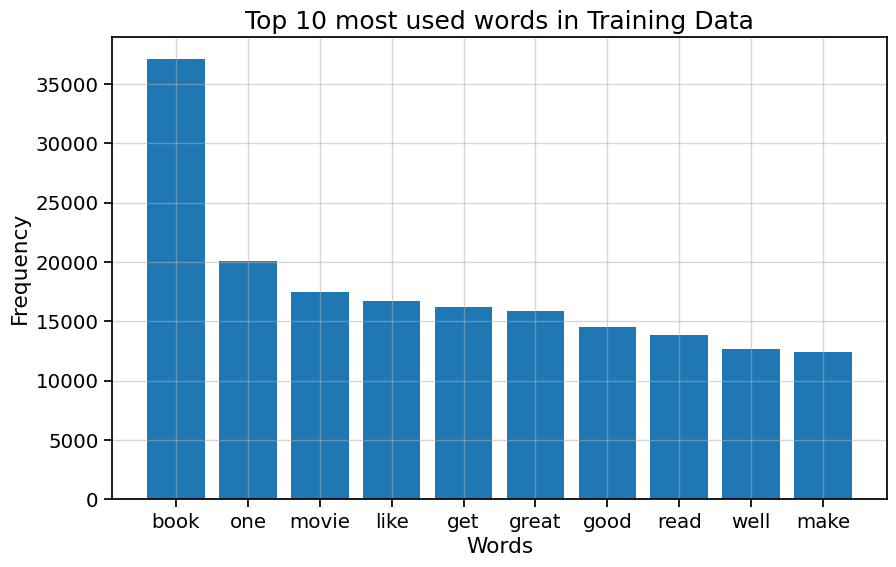

In [22]:
# Bar plot of top 10 most used words in training data 

import collections

words = []
for text in train_data['text']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))

# Figure Size
plt.figure(figsize = (10, 6))

# Create the Barplot
plt.bar(range(len(top_words)), list(top_words.values()), align = 'center')

# Creating a y axis with words
plt.xticks(range(len(top_words)), list(top_words.keys()))

# Grid Opacity
plt.grid(alpha = 0.5)

# Title and labels
plt.title('Top 10 most used words in Training Data', fontsize = 18)
plt.xlabel('Words')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

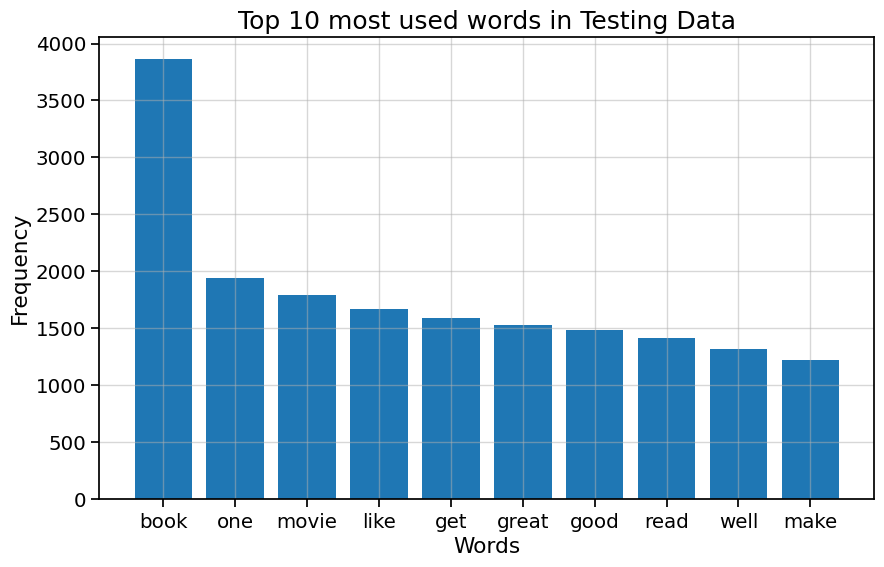

In [23]:
# Bar plot of top 10 most used words in testing data 

words = []
for text in test_data['text']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))

# Figure Size
plt.figure(figsize = (10, 6))

# Create the Barplot
plt.bar(range(len(top_words)), list(top_words.values()), align = 'center')

# Creating a y axis with words
plt.xticks(range(len(top_words)), list(top_words.keys()))

# Grid Opacity
plt.grid(alpha = 0.5)
# Title and labels
plt.title('Top 10 most used words in Testing Data', fontsize = 18)
plt.xlabel('Words')
plt.ylabel('Frequency')

## Modelling

### Tokenization

In [24]:
!pip install transformers

In [25]:
from transformers import BertTokenizer

# Initialize the Bert tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the training data
train_encodings = tokenizer(train_data['text'].tolist(), 
                            add_special_tokens=True, 
                            truncation=True, 
                            padding=True)

# Tokenize the testing data
test_encodings = tokenizer(test_data['text'].tolist(), 
                           add_special_tokens=True, 
                           truncation=True, 
                           padding=True)

### Convert Data into PyTorch Tensors

In [26]:
import torch

# Convert the tokens to tensor format
train_inputs = torch.tensor(train_encodings['input_ids'])
train_masks = torch.tensor(train_encodings['attention_mask'])
train_labels = torch.tensor(train_data['polarity'].map({1: 0, 2: 1}).values)

test_inputs = torch.tensor(test_encodings['input_ids'])
test_masks = torch.tensor(test_encodings['attention_mask'])
test_labels = torch.tensor(test_data['polarity'].map({1: 0, 2: 1}).values)

### Create Data Loaders

In [27]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 32

# Create the DataLoader for training
train_data_new = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data_new)
train_dataloader = DataLoader(train_data_new, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for testing
test_data_new = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data_new)
test_dataloader = DataLoader(test_data_new, sampler=test_sampler, batch_size=batch_size)


### Bert Model

#### Model Initialization

In [28]:
from transformers import BertForSequenceClassification

# Initialize the BERT model for sequence classification
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
bert_model.cuda()  # Move the model to the GPU

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

#### Train the Model

In [29]:
from transformers import AdamW
import time

# Define the optimizer
optimizer = AdamW(bert_model.parameters(), lr=5e-5)


print("")
print('Training...')

# Measure how long the training takes
t0 = time.time()

# Reset the total loss
total_train_loss = 0

bert_model.train()  # Set the model to training mode

for step, batch in enumerate(train_dataloader):  # For each batch...
    # Progress update every 40 batches
    if step % 40 == 0 and not step == 0:
        # Calculate elapsed time in minutes
        elapsed = time.time() - t0
        
        # Report progress
        print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), time.strftime("%H:%M:%S", time.gmtime(elapsed))))

    b_input_ids, b_input_mask, b_labels = tuple(t.to('cuda') for t in batch)  # Move batch to GPU
    bert_model.zero_grad()  # Clear any previously calculated gradients
    
    outputs = bert_model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
    loss = outputs[0]  # Extract the loss

    total_train_loss += loss.item()

    loss.backward()  # Perform a backward pass to calculate gradients
    optimizer.step()  # Update the weights

# Calculate the average loss over all of the batches
avg_train_loss = total_train_loss / len(train_dataloader)            

# Measure how long this training took
training_time = time.time() - t0

print("")
print("  Average training loss: {0:.2f}".format(avg_train_loss))
print("  Total training took: {:}".format(time.strftime("%H:%M:%S", time.gmtime(training_time))))

print("")
print("Training complete!")

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



Training...
  Batch    40  of  1,563.    Elapsed: 00:00:47.
  Batch    80  of  1,563.    Elapsed: 00:01:38.
  Batch   120  of  1,563.    Elapsed: 00:02:31.
  Batch   160  of  1,563.    Elapsed: 00:03:24.
  Batch   200  of  1,563.    Elapsed: 00:04:17.
  Batch   240  of  1,563.    Elapsed: 00:05:09.
  Batch   280  of  1,563.    Elapsed: 00:06:02.
  Batch   320  of  1,563.    Elapsed: 00:06:55.
  Batch   360  of  1,563.    Elapsed: 00:07:48.
  Batch   400  of  1,563.    Elapsed: 00:08:41.
  Batch   440  of  1,563.    Elapsed: 00:09:34.
  Batch   480  of  1,563.    Elapsed: 00:10:27.
  Batch   520  of  1,563.    Elapsed: 00:11:19.
  Batch   560  of  1,563.    Elapsed: 00:12:12.
  Batch   600  of  1,563.    Elapsed: 00:13:05.
  Batch   640  of  1,563.    Elapsed: 00:13:58.
  Batch   680  of  1,563.    Elapsed: 00:14:51.
  Batch   720  of  1,563.    Elapsed: 00:15:43.
  Batch   760  of  1,563.    Elapsed: 00:16:36.
  Batch   800  of  1,563.    Elapsed: 00:17:29.
  Batch   840  of  1,563.  

#### Evaluate the model

In [30]:
# Evaluation loop
bert_model.eval()  # Set the model to evaluation mode
predictions = []
for batch in test_dataloader:  # For each batch...
    batch = tuple(t.to('cuda') for t in batch)
    b_input_ids, b_input_mask, b_labels = batch
    with torch.no_grad():  # Disable gradient calculation
        outputs = bert_model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
    logits = outputs[0]
    predictions.append(logits.detach().cpu().numpy())  # Store predictions

In [31]:
# Save the model
bert_model.save_pretrained('/path/to/save/bert_model')

#### Performance Metrics

In [32]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Flatten the predictions and true values for aggregate metrics
flat_predictions = np.concatenate(predictions, axis=0)
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
flat_true_labels = test_labels.numpy().flatten()

# Calculate accuracy
accuracy = accuracy_score(flat_true_labels, flat_predictions)

# Calculate precision, recall, and F1 score
precision, recall, f1, _ = precision_recall_fscore_support(flat_true_labels, flat_predictions, average='binary')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9012
Precision: 0.9078377313903111
Recall: 0.898635477582846
F1 Score: 0.9032131661442007


## Aspect Based Sentiment Analysis

### Extract Aspects

In [33]:
import spacy

nlp = spacy.load("en_core_web_sm")

def extract_aspects(text):
    doc = nlp(text)
    aspects = [chunk.text for chunk in doc.noun_chunks]
    return aspects

train_data['aspects'] = train_data['text'].apply(extract_aspects)

### Bert for Aspect Sentiment Analysis

In [34]:
from transformers import BertTokenizer
from torch.utils.data import DataLoader, SequentialSampler, TensorDataset
import torch

# Load the tokenizer and model
#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#bert_model.cuda()  # Make sure the model is on GPU

# Prepare aspect texts for prediction
def prepare_for_prediction(texts):
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")
    return inputs

# Predict sentiment using BERT
def predict_sentiment(texts):
    inputs = prepare_for_prediction(texts)
    inputs = {key: value.cuda() for key, value in inputs.items()}  # Move input tensors to GPU

    with torch.no_grad():
        outputs = bert_model(**inputs)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=1).cpu().numpy()  # Move predictions back to CPU
    return predictions  # This will be an array of sentiment labels

# Applying predictions to each aspect
train_data['aspect_sentiments'] = train_data['aspects'].apply(lambda aspects: predict_sentiment(aspects) if aspects else [])

In [35]:
train_data.head()

,polarity,text,aspects,aspect_sentiments
0,2,sound track beautiful paint senery mind well w...,"[sound track beautiful paint senery mind, even...","[1, 0, 1, 0, 1, 0, 1, 1]"
1,2,im reading lot review say best game soundtrack...,"[i, lot review, id write review, mitsudas ulti...","[0, 1, 0, 1, 0, 1, 0, 0, 0, 0]"
2,2,soundtrack favorite music time hand intense sa...,"[favorite music time hand, you, game hope, dis...","[1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1]"
3,2,truly like soundtrack enjoy video game music p...,"[soundtrack, video game music, game music, sca...","[0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1]"
4,2,youve played game know divine music every sing...,"[you, game, divine music, tell story game, dou...","[0, 0, 1, 1, 0, 1, 0, 1, 0]"


### Aggregate Results

In [36]:
# # Print the results
# for index, row in train_data.iterrows():
#     print("Review:", row['text'])
#     for aspect, sentiment in zip(row['aspects'], row['aspect_sentiments']):
#         print(f"Aspect: {aspect}, Sentiment: {'Positive' if sentiment == 1 else 'Negative' if sentiment == 0 else 'Neutral'}")
#     print("\n")

## Results Visualization

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

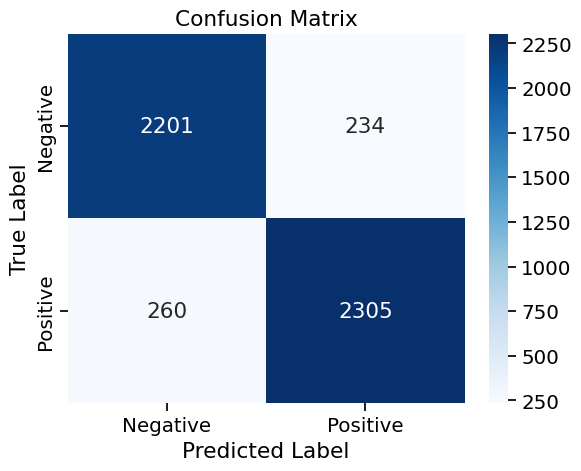

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'results' is a DataFrame containing the columns 'true_labels' and 'predicted_labels'
results = pd.DataFrame({
    'true_labels': flat_true_labels,  # replace with your actual data
    'predicted_labels': flat_predictions  # replace with your actual data
})

# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(results['true_labels'], results['predicted_labels'])
class_names = ['Negative', 'Positive']  # Add 'Neutral' if you have neutral sentiments

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

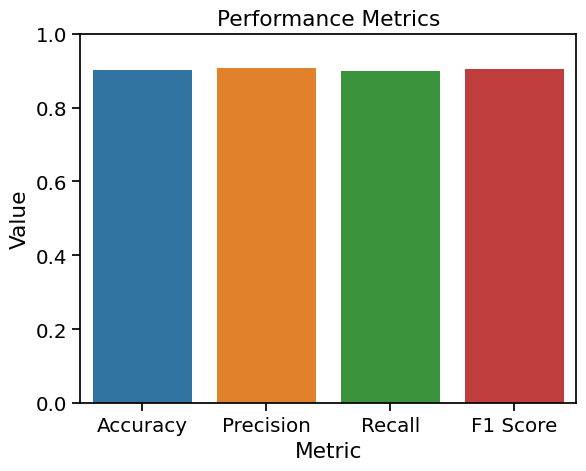

In [38]:
# Calculate the accuracy, precision, recall, and F1 score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
accuracy = accuracy_score(results['true_labels'], results['predicted_labels'])
precision, recall, f1, _ = precision_recall_fscore_support(results['true_labels'], results['predicted_labels'], average='binary')

# Creating a DataFrame for the calculated metrics
metrics_df = pd.DataFrame([{'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}])

# Melting the DataFrame to have the metrics in a long format
metrics_long_df = pd.melt(metrics_df)

# Plotting the metrics
sns.barplot(x='variable', y='value', data=metrics_long_df)
plt.title('Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.ylim(0, 1)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

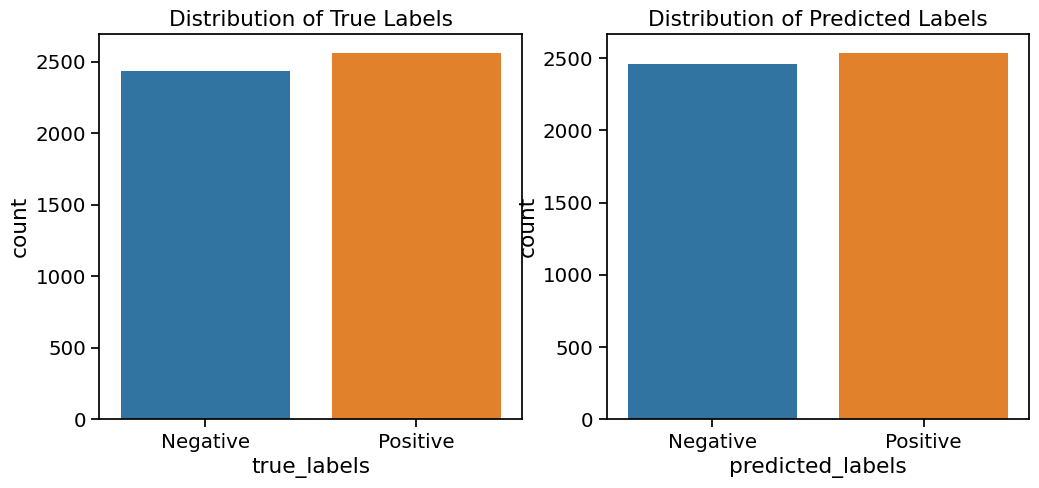

In [39]:
# Visualizing the distribution of true versus predicted sentiments
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='true_labels', data=results, ax=axes[0])
axes[0].set_title('Distribution of True Labels')
axes[0].set_xticklabels(class_names)
sns.countplot(x='predicted_labels', data=results, ax=axes[1])
axes[1].set_title('Distribution of Predicted Labels')
axes[1].set_xticklabels(class_names)
plt.show()